In [0]:
project_name = 'test_project_1'
#permissions='default'
permissions='fulldata'

In [0]:
%run /Snippets/header_008

PROJECT DETAILS:
Project identifier: test_project_1
Cluster data access level: fulldata


EXECUTION DETAILS:
Spark version: 11.3.x-scala2.12, 
Cluster Node Type: i3.xlarge, 
Driver Node Type: c4.2xlarge, 
Worker Node Type: i3.xlarge


DATA SNAPSHOT DETAILS:
This notebook uses the latest snapshot date for this version: "v008.20240329092717/", (29 March 2024)

 The following are the Scopus snapshot dates available for datasets at v008:
['v008.20220314092239/', 'v008.20220906063204/', 'v008.20221021151538/', 'v008.20230509104116/', 'v008.20230821105000/', 'v008.20231003094404/', 'v008.20240329092717/']
(If you want to use a different snapshot, in the first cell of your notebook, set the variable `custom_snapshot_date` to one of the options listed above (string data type))



DATA SAMPLE DETAILS:
Setting paths to run on full datasets (100% Scopus publication volume)


In [0]:
%pip install markupsafe==2.0.1
%pip install rpy2

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
  ERROR: Command errored out with exit status 1:
   command: /local_disk0/.ephemeral_nfs/envs/pythonEnv-2b524422-0374-46fa-b149-050105d07846/bin/python /local_disk0/.ephemeral_nfs/envs/pythonEnv-2b524422-0374-46fa-b149-050105d07846/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /tmp/tmpoil3z0gj
       cwd: /tmp/pip-install-3fp4xv4s/rpy2_5e8332f6d85d4cd5a1601c2945e9bf1d
  Complete output (16 lines):
  Traceback (most recent call last):
    File "/local_disk0/.ephemeral_nfs/envs/pythonEnv-2b524422-0374-46fa-b149-050105d07846/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py", line 349, 

In [0]:
import pandas as pd
total = pd.read_csv("/dbfs/FileStore/shared_uploads/arabi2@wisc.edu/us_media_analysis.csv")
print(total.dtypes)

print("len of total ", len(total))
print(total['doi'].nunique())
total = total.drop_duplicates(subset = ['doi'])

print("len of total after dropping duplicate dois ", len(total))

#total['cor_gender'].unique() //array(['female', 'male', 'M', 'F', 'f', 'm'], dtype=object)
ret = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/arabi2@wisc.edu/retrected_doi_wos.csv")
retracted = ret.select('doi').toPandas()
ids_to_remove = retracted['doi']
print(len(total))
total2 = total[~total['doi'].isin(ids_to_remove)]
print(len(total2))
us = total2[total2['country_name'] == 'United States']
print(len(us))
print(len(us[us['news_cnt'] > 0]))
print(len(us[us['news_cnt'] <= 0]))
print(us.dtypes)

Domain_English        object
Field_English         object
SubField_English      object
srcid                  int64
openaccess_status     object
doi                   object
news_cnt               int64
year                   int64
issn                  object
num_au                 int64
cor_gender            object
TopicId                int64
Au1_gender            object
country_name          object
SJR                  float64
subfield_article      object
preferred_name        object
org_type              object
cor_au1                int64
dtype: object
len of total  1014175
1014077
len of total after dropping duplicate dois  1014077
1014077
1014035
1014035
129428
884607
Domain_English        object
Field_English         object
SubField_English      object
srcid                  int64
openaccess_status     object
doi                   object
news_cnt               int64
year                   int64
issn                  object
num_au                 int64
cor_gender            obj

In [0]:
import pandas as pd
import ast
df1 = pd.read_csv("/dbfs/FileStore/shared_uploads/arabi2@wisc.edu/jiaxin_pred_sh_1.csv",converters={'sent_pred': ast.literal_eval})
print(len(df1))
print(df1['doi'].nunique())
print(df1.dtypes)
print(df1['gender'].unique())
df1 = df1.drop(columns=['gender'], axis = 1)
print(df1.dtypes)
df1['certainty'] = df1['sent_pred'].apply(lambda x: x[0])
print(df1.head(3))

518488
5853
URL           object
doi           object
media         object
gender        object
word_count     int64
sentence      object
sent_len       int64
post_id        int64
sent_pred     object
dtype: object
['female' 'male' 'F' 'M' 'm']
URL           object
doi           object
media         object
word_count     int64
sentence      object
sent_len       int64
post_id        int64
sent_pred     object
dtype: object
                                                 URL  \
0  https://www.yahoo.com/lifestyle/golf-cart-gail...   
1  https://www.yahoo.com/lifestyle/golf-cart-gail...   
2  https://www.yahoo.com/lifestyle/golf-cart-gail...   

                             doi   media  word_count  \
0  10.1080/19320248.2018.1512931  yahoo!        1332   
1  10.1080/19320248.2018.1512931  yahoo!        1332   
2  10.1080/19320248.2018.1512931  yahoo!        1332   

                                            sentence  sent_len  post_id  \
0  A woman riding past a teen soccer game on a g

In [0]:
print(len(us))
us = us.drop_duplicates(subset = ['doi'])
print(len(us))
merged = df1.merge(us, on = 'doi', how = 'inner')
print(len(merged))
print(merged['doi'].nunique())
print(merged['cor_gender'].unique())


1014035
1014035
518451
5851
['female' 'male' 'F' 'M' 'm']


In [0]:
dummy = merged.copy()
dummy = dummy.dropna(subset = ['cor_gender','certainty'])
print(len(dummy))
gender = []
for ind in dummy.index:
    if dummy['cor_gender'][ind] == "female" or dummy['cor_gender'][ind] == "f" or dummy['cor_gender'][ind] == "F":
        gender.append(1) #
    elif dummy['cor_gender'][ind] == "male" or dummy['cor_gender'][ind] == "m" or dummy['cor_gender'][ind] == "M": ##there is no null value in gender, so it is safe to say that if someone is not female, he must be male
        gender.append(0) #
dummy['gender'] = gender

518451


Out[11]: <AxesSubplot:>

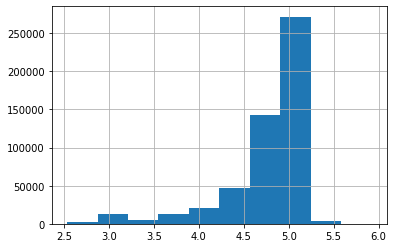

In [0]:
import numpy as np
#x = dummy.copy(deep = True)
#x['pow'] = x['certainty'].apply(lambda x: x**2)
#x['pow'].hist()
dummy['certainty'].hist()
#np.log10(dummy['certainty']).hist()

Out[12]: <AxesSubplot:>

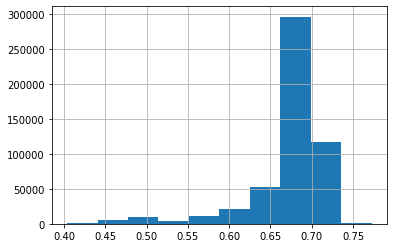

In [0]:
import numpy as np
np.log10(dummy['certainty']).hist()

In [0]:
q = []
q1,q2,q3 = 0.124,0.25,0.597
for ind in dummy.index:
  if dummy['SJR'][ind] <= q1:
    q.append(0)
  elif dummy['SJR'][ind] > q1 and dummy['SJR'][ind] <= q2:
    q.append(1)
  elif dummy['SJR'][ind] > q2 and dummy['SJR'][ind] <= q3:
    q.append(2)
  else:
    q.append(3)
dummy['q'] = q

In [0]:
import numpy as np
import rpy2.robjects.packages as rpackages
import rpy2.robjects.vectors as robjects_vectors


from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

# import R's utility package
#utils = rpackages.importr('utils')
#utils.chooseCRANmirror(ind=1)
from rpy2.robjects.conversion import localconverter
base = importr('base')
from rpy2.robjects import Formula
stats = importr('stats')
nnet = importr('nnet')

### Main analysis reported in the paper

In [0]:
tmp = pd.DataFrame()
tmp['certainty'] = dummy['certainty']
tmp['gender'] = dummy['gender']
tmp['year'] = dummy['year']
tmp['Domain_English'] = dummy['Domain_English']
tmp['Field_English'] = dummy['Field_English']
tmp['SubField_English'] = dummy['SubField_English']
tmp['q'] = dummy['q']
tmp['post_id'] = dummy['post_id']

tmp = tmp.dropna(subset = ['certainty'])

#We get same significance decision for both gaussian and gamma (identity) distribution
#gamma identity and log gives same significance
#entire data: insignificant #coeff: -1.944e-05

#tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] #insig, coeff = 0.00022
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #insig, coeff = 0.020 //for gamma(identity), p val = 0.06684 .
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] # gender1 = 0.019030, err = 0.003022, p val = 3.23e-10 *** (men get less certainty score), CI 0.013105870 0.024953715 (2.5% 97.5%)
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #gender1 = -2.730e-03, err = 7.327e-04, p val = 0.000195 *** (men get more certainty score), CI -0.0041663894 -0.0012940957
tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #insig, coeff = 0.0010490


with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


col_2_index = list(tst_df.colnames).index('gender')
col_2 = ro.vectors.FactorVector(tst_df.rx2('gender'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

'''col_2_index = list(tst_df.colnames).index('post_id')
col_2 = ro.vectors.FactorVector(tst_df.rx2('post_id'))
tst_df[col_2_index] = col_2'''



#print(tst_df)
#pandas2ri.activate()
model = stats.glm("certainty ~ gender+year+q+Field_English",
                  data=tst_df,family=ro.r('Gamma(link="log")')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")') family=ro.r('gaussian')
print(base.summary(model))


Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, singular.ok = TRUE, 
    contrasts = NULL, ...) 
{
    cal <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if (!is.character(method

In [0]:
a = stats.confint_default(model)
print(a)

                                                     2.5 %        97.5 %
(Intercept)                                   1.5301428036  1.6440998642
gender1                                      -0.0041663894 -0.0012940957
year2019                                      0.0019186723  0.0056807962
year2020                                     -0.0017586962  0.0019082687
year2021                                      0.0018624457  0.0067342921
year2022                                     -0.0002375983  0.0035004112
q2                                           -0.0921282842  0.0221557153
q3                                           -0.0921919358  0.0217132777
Field_EnglishClinical Medicine                0.0005258172  0.0030882082
Field_EnglishPsychology & Cognitive Sciences -0.0073997121 -0.0002583344
Field_EnglishPublic Health & Health Services  0.0099849890  0.0153720452



In [0]:
import numpy as np
def cohend(d,outcome, val, domain):
    data = d[d['Domain_English'] == domain]
    print("len of data ",len(data))
    grp1 = data[data[outcome] == 1]
    grp0 = data[data[outcome] == 0]

    n0,n1 = len(grp0),len(grp1)
    m0, m1 = grp0[val].mean(), grp1[val].mean()

    s0,s1 = grp0[val].std(), grp1[val].std()

    print("n0 ",n0," n1 ",n1, " m0 ",m0," m1 ",m1, " s0 ",s0," s1 ",s1)

    spooled1 = np.sqrt(((s0*s0)+(s1*s1))/2)
    print("cohen d ", (m1 - m0)/spooled1)

    spooled2 = (((n0 - 1) * s0 * s0) + ((n1 - 1) * s1 * s1))/(n0 + n1 - 2)
    spooled2 = np.sqrt(spooled2)
    print("cohen d ", (m1 - m0)/spooled2)

#cohend(dummy.copy(deep = True), 'gender','certainty','Applied Sciences') 

#cohend(dummy.copy(deep = True), 'gender','certainty','Arts & Humanities') 

#cohend(dummy.copy(deep = True), 'gender','certainty','Economic & Social Sciences') #0.2877

#cohend(dummy.copy(deep = True), 'gender','certainty','Natural Sciences') 

#cohend(dummy.copy(deep = True), 'gender','certainty','Health Sciences') #-0.022

len of data  105908
n0  79589  n1  26319  m0  4.734903371237231  m1  4.72440760590448  s0  0.47258245208041166  s1  0.48735967994805063
cohen d  -0.021864905405786967
cohen d  -0.02203615668214325


In [0]:
print(len(dummy))
print(dummy['doi'].nunique())

518451
5851


### Weighted Regression

In [0]:
weight = []
for ind in dummy.index:
    weight.append(1/dummy['sent_len'][ind])

dummy['weight'] = weight

In [0]:
tmp = pd.DataFrame()
tmp['certainty'] = dummy['certainty']
tmp['gender'] = dummy['gender']
tmp['year'] = dummy['year']
tmp['Domain_English'] = dummy['Domain_English']
tmp['Field_English'] = dummy['Field_English']
tmp['SubField_English'] = dummy['SubField_English']
tmp['q'] = dummy['q']
tmp['post_id'] = dummy['post_id']
tmp['weight'] = dummy['weight']

tmp = tmp.dropna(subset = ['certainty'])


##got same result for weighted and unweighted unless gamma (identity) for arts & Humanities (though it was pretty marginal (p val = 0.04),not strong)
#entire data: insignificant

#tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] #insig
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #gmale = 0.109528, p val = 0.0477 *
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] # Gmale = -0.0953, p val = 8.24e-11 *** (men get less certainty score)
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #gmale = 0.015265 , p val = 1.79e-05 *** (men get more certainty score)
tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #insig


with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


'''col_2_index = list(tst_df.colnames).index('Domain_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Domain_English'))
tst_df[col_2_index] = col_2'''

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

weight = list(tst_df.colnames).index('weight')

'''col_2_index = list(tst_df.colnames).index('post_id')
col_2 = ro.vectors.FactorVector(tst_df.rx2('post_id'))
tst_df[col_2_index] = col_2'''



#print(tst_df)
#pandas2ri.activate()
model = stats.glm("certainty ~ gender+year+q+Field_English",
                  data=tst_df,weights = tst_df[weight],family=ro.r('Gamma(link="identity")')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")') family=ro.r('gaussian')
print(base.summary(model))


Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, singular.ok = TRUE, 
    contrasts = NULL, ...) 
{
    cal <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if (!is.character(method

#### Draft

In [0]:
#utils = rpackages.importr('utils')
#utils.chooseCRANmirror(ind=1)
#utils.install_packages("fixest")
fixest = rpackages.importr("fixest")
import numpy as np
import rpy2.robjects.packages as rpackages
import rpy2.robjects.vectors as robjects_vectors


from rpy2.robjects import r, pandas2ri
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

# import R's utility package
#utils = rpackages.importr('utils')
#utils.chooseCRANmirror(ind=1)
from rpy2.robjects.conversion import localconverter
base = importr('base')
from rpy2.robjects import Formula
stats = importr('stats')
nnet = importr('nnet')

In [0]:
tmp = pd.DataFrame()
tmp['certainty'] = dummy['certainty']
tmp['gender'] = dummy['gender']
tmp['year'] = dummy['year']
tmp['Domain_English'] = dummy['Domain_English']
tmp['Field_English'] = dummy['Field_English']
tmp['SubField_English'] = dummy['SubField_English']
tmp['q'] = dummy['q']
tmp['post_id'] = dummy['post_id']

tmp = tmp.dropna(subset = ['certainty'])

#tmp = tmp[tmp['Field_English'] == 'Mathematics & Statistics']
#print(tmp['gender'].unique())
tmp = tmp[tmp['Domain_English'] == 'Applied Sciences'] #est Gmale = -0.007596, p val = 0.050 .
#tmp = tmp[tmp['Domain_English'] == 'Arts & Humanities'] #insig
#tmp = tmp[tmp['Domain_English'] == 'Economic & Social Sciences'] # Gmale = 0.0610953, p val = 0.0535 .
#tmp = tmp[tmp['Domain_English'] == 'Health Sciences'] #insig
#tmp = tmp[tmp['Domain_English'] == 'Natural Sciences'] #insig

#tmp = tmp[tmp['Field_English'] == 'Biology'] #insig

##hitgher value: more positive means more conservative

with localconverter(ro.default_converter + pandas2ri.converter):
  tst_df = ro.conversion.py2rpy(tmp)

col_2_index = list(tst_df.colnames).index('year')
col_2 = ro.vectors.FactorVector(tst_df.rx2('year'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('q')
col_2 = ro.vectors.FactorVector(tst_df.rx2('q'))
tst_df[col_2_index] = col_2


'''col_2_index = list(tst_df.colnames).index('Domain_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Domain_English'))
tst_df[col_2_index] = col_2'''

col_2_index = list(tst_df.colnames).index('Field_English')
col_2 = ro.vectors.FactorVector(tst_df.rx2('Field_English'))
tst_df[col_2_index] = col_2

col_2_index = list(tst_df.colnames).index('post_id')
col_2 = ro.vectors.FactorVector(tst_df.rx2('post_id'))
tst_df[col_2_index] = col_2



#print(tst_df)
#pandas2ri.activate()
'''model = stats.glm("certainty ~ gender+year+q+post_id",
                  data=tst_df,family=ro.r('gaussian')) #family=ro.r('gaussian(link="identity")') #family=ro.r('poisson(link="log")')
'''

#model = ro.r.lm(formula=Formula("certainty ~ gender"), data=tst_df)
model = ro.r.feols(fml=Formula("certainty ~ gender| year+q+post_id+Field_English"), data=tst_df)
print(base.summary(model))

R[write to console]: Error: in (function (fml, data, vcov, weights, offset, subs...: 
The only variable 'gendermale' is collinear with the fixed effects. In such
circumstances, the estimation is void.



---------------------------------------------------------------------------
RRuntimeError                             Traceback (most recent call last)
<command-3623502227391731> in <cell line: 58>()
     56 
     57 #model = ro.r.lm(formula=Formula("certainty ~ gender"), data=tst_df)
---> 58 model = ro.r.feols(fml=Formula("certainty ~ gender| year+q+post_id+Field_English"), data=tst_df)
     59 print(base.summary(model))

/local_disk0/.ephemeral_nfs/envs/pythonEnv-a768cf16-949f-4da0-b50e-17796fba80bc/lib/python3.9/site-packages/rpy2/robjects/functions.py in __call__(self, *args, **kwargs)
    201                 v = kwargs.pop(k)
    202                 kwargs[r_k] = v
--> 203         return (super(SignatureTranslatedFunction, self)
    204                 .__call__(*args, **kwargs))
    205 

/local_disk0/.ephemeral_nfs/envs/pythonEnv-a768cf16-949f-4da0-b50e-17796fba80bc/lib/python3.9/site-packages/rpy2/robjects/functions.py in __call__(self, *args, **kwargs)
    124             else

In [0]:
xx = dummy.drop_duplicates(subset = ['post_id'])
xx = xx.sort_values(by = ['post_id'])
print(xx.head(20))

                                                    URL  \
0     https://www.yahoo.com/lifestyle/golf-cart-gail...   
43    https://www.newscientist.com/article/2184541-h...   
200   http://www.nbcnews.com/mach/science/robotic-sk...   
508   https://gulfnews.com/opinion/thinkers/there-s-...   
1516  https://www.labroots.com/trending/technology/2...   
1602  http://ct.moreover.com/?a=48141661777&p=1pl&v=...   
2027  http://ct.moreover.com/?a=46906221804&p=1pl&v=...   
3802  http://www.sciencealert.com/american-food-wast...   
4786  http://ct.moreover.com/?a=47662652186&p=1pl&v=...   
4816  https://phys.org/news/2019-05-midwestern-fish-...   
5001  https://www.dddmag.com/news/2019/01/unmuting-l...   
5076  http://ct.moreover.com/?a=48438111136&p=1pl&v=...   
6462  http://ct.moreover.com/?a=48268573583&p=1pl&v=...   
6522  https://www.newkerala.com/news/read/269487/new...   
6718  http://7thspace.com/headlines/1213159/23_years...   
6744  https://newatlas.com/materials/silicon-strengt... 

### Draft

In [0]:
print(merged['gender'].unique())
print(merged['cor_gender'].unique())

G1, G2 = [], []
for ind in merged.index:
    if merged['gender'][ind] == "female" or merged['gender'][ind] == "F":
        G1.append("female")
    else:
        G1.append("male")

    if merged['cor_gender'][ind] == "female" or merged['cor_gender'][ind] == "F":
        G2.append("female")
    else:
        G2.append("male")
merged['G1'] = G1
merged['G2'] = G2

['female' 'male' 'F' 'M' 'm']
['female' 'male' 'F' 'M' 'm']


In [0]:
for ind in merged.index:
    if merged['G1'][ind] != merged['G2'][ind]:
        print("ohh no ",merged['G1'][ind]," ",merged['G2'][ind]," ",merged['doi'][ind])

ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.01.016
ohh no  male   female   10.1016/j.neuron.2018.

In [0]:
dbutils.fs.rm("dbfs:/FileStore/shared_uploads/arabi2@wisc.edu/jiaxin_pred_old_sh_1.csv", recurse = True)

Out[9]: True

In [0]:
us[us['doi'] == "10.1016/j.neuron.2018.01.016"]

,Domain_English,Field_English,SubField_English,srcid,openaccess_status,doi,news_cnt,year,issn,num_au,cor_gender,TopicId,Au1_gender,country_name,SJR,subfield_article,preferred_name,org_type,cor_au1
505382,Health Sciences,Clinical Medicine,neurology & neurosurgery,17978,NO,10.1016/j.neuron.2018.01.016,100,2018,08966273,13,female,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886


In [0]:
merged[merged['doi'] == "10.1016/j.neuron.2018.01.016"]

,URL,doi,media,gender,word_count,sentence,sent_len,post_id,sent_pred,Domain_English,...,TopicId,Au1_gender,country_name,SJR,subfield_article,preferred_name,org_type,cor_au1,G1,G2
447155,http://wunc.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,wunc,male,538,Scientists have found specialized brain cells ...,19,13394,[4.6267715],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447156,http://wunc.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,wunc,male,538,"The finding, reported Wednesday in the journal...",19,13394,[3.4165716],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447157,http://wunc.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,wunc,male,538,But the research is at an early stage and lab ...,19,13394,[4.9972186],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447158,http://wunc.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,wunc,male,538,The discovery of anxiety cells is just the lat...,19,13394,[4.825806],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447159,http://wunc.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,wunc,male,538,Anxiety disorders involve excessive worry that...,19,13394,[4.953763],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447593,http://krvs.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,radioacadie,male,538,But theres a lot more to anxiety than just the...,19,13419,[4.827466],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447594,http://krvs.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,radioacadie,male,538,"For example, the cells in the hippocampus comm...",19,13419,[4.9097705],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447595,http://krvs.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,radioacadie,male,538,Kheirbek says other parts of the anxiety circu...,19,13419,[3.1219504],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female
447596,http://krvs.org/post/researchers-discover-anxi...,10.1016/j.neuron.2018.01.016,radioacadie,male,538,"In recent years, he says, scientists have been...",19,13419,[4.831283],Health Sciences,...,3061,female,United States,11.377,neurology & neurosurgery,Columbia University,univ,7005852886,male,female


In [0]:
merged['news_cnt'].min()

Out[27]: 1